In [187]:
import tensorflow as tf

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler  
import scikitplot as skplt

In [188]:
ls

 Volume in drive C is Windows
 Volume Serial Number is AC6A-A0D2

 Directory of C:\Users\sudik\Jupyter Python Projects\Machine Learning\Predicting COVID-19 Deaths

2023-01-06  03:35 AM    <DIR>          .
2023-01-05  06:32 PM    <DIR>          ..
2023-01-05  06:33 PM    <DIR>          .ipynb_checkpoints
2023-01-05  06:32 PM        58,451,825 Covid Data.csv
2023-01-06  03:35 AM            49,735 Predicting COVID-19 Deaths.ipynb
               2 File(s)     58,501,560 bytes
               3 Dir(s)  787,727,147,008 bytes free


In [189]:
df = pd.read_csv('Covid Data.csv')

In [190]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [192]:
df['DATE_DIED'] = [0 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   DATE_DIED             1048575 non-null  int64
 5   INTUBED               1048575 non-null  int64
 6   PNEUMONIA             1048575 non-null  int64
 7   AGE                   1048575 non-null  int64
 8   PREGNANT              1048575 non-null  int64
 9   DIABETES              1048575 non-null  int64
 10  COPD                  1048575 non-null  int64
 11  ASTHMA                1048575 non-null  int64
 12  INMSUPR               1048575 non-null  int64
 13  HIPERTENSION          1048575 non-null  int64
 14  OTHER_DISEASE         1048575 non-null  int64
 15  CARDIOVASCULAR 

In [194]:
col_norm = df.columns

In [195]:
df.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,1,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,1,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97


In [196]:
df1_norm = df[col_norm].apply(lambda x :( (x - x.min()) / (x.max()-x.min()) ) )

In [198]:
df.head(2)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,1.0,0.0,0.0,0.0,1.0,0.979592,0.0,0.537190,0.010309,0.010309,...,0.010309,0.010309,0.0,0.010309,0.010309,0.010309,0.010309,0.010309,0.333333,0.979592
1,1.0,0.0,1.0,0.0,1.0,0.979592,0.0,0.595041,0.989691,0.010309,...,0.010309,0.010309,0.0,0.010309,0.010309,0.000000,0.000000,0.010309,0.666667,0.979592


In [199]:
col_norm

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [200]:
def create_feature_column():
    
    feat_USMER = tf.feature_column.numeric_column('USMER')
    feat_MEDICAL_UNIT = tf.feature_column.numeric_column('MEDICAL_UNIT')
    feat_SEX = tf.feature_column.numeric_column('SEX')
    feat_PATIENT_TYPE = tf.feature_column.numeric_column('PATIENT_TYPE')
    feat_INTUBED = tf.feature_column.numeric_column('INTUBED')
    feat_PNEUMONIA = tf.feature_column.numeric_column('PNEUMONIA')
    feat_AGE = tf.feature_column.numeric_column('AGE')
    feat_PREGNANT = tf.feature_column.numeric_column('PREGNANT')
    feat_DIABETES = tf.feature_column.numeric_column('DIABETES')
    feat_COPD = tf.feature_column.numeric_column('COPD')
    feat_ASTHMA = tf.feature_column.numeric_column('ASTHMA')
    feat_INMSUPR = tf.feature_column.numeric_column('INMSUPR')
    feat_HIPERTENSION = tf.feature_column.numeric_column('HIPERTENSION')
    feat_OTHER_DISEASE = tf.feature_column.numeric_column('OTHER_DISEASE')
    feat_CARDIOVASCULAR = tf.feature_column.numeric_column('CARDIOVASCULAR')
    feat_OBESITY = tf.feature_column.numeric_column('OBESITY')
    feat_RENAL_CHRONIC = tf.feature_column.numeric_column('RENAL_CHRONIC')
    feat_TOBACCO = tf.feature_column.numeric_column('TOBACCO')
    feat_CLASIFFICATION_FINAL = tf.feature_column.numeric_column('CLASIFFICATION_FINAL')
    feat_ICU = tf.feature_column.numeric_column('ICU')
    
    feature_column = [feat_USMER, feat_MEDICAL_UNIT, feat_SEX, feat_PATIENT_TYPE, feat_INTUBED, 
                      feat_PNEUMONIA , feat_AGE, feat_PREGNANT, feat_DIABETES, feat_COPD, feat_ASTHMA,
                      feat_INMSUPR, feat_HIPERTENSION, feat_OTHER_DISEASE, feat_CARDIOVASCULAR, feat_OBESITY,
                      feat_RENAL_CHRONIC, feat_TOBACCO, feat_CLASIFFICATION_FINAL, feat_ICU] 
    
    return feature_column

feature_column = create_feature_column()

In [201]:
x = df1_norm
y = df['DATE_DIED']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [202]:
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Train, 
                                                           Y_Train,
                                                           batch_size = 50,
                                                           num_epochs = 1000,
                                                           shuffle = True)

In [203]:
eval_func = tf.compat.v1.estimator.inputs.pandas_input_fn(X_Test,
                                                          Y_Test,
                                                          batch_size = 50,
                                                          num_epochs = 1,
                                                          shuffle = False)

In [204]:
predict_input_fn = tf.compat.v1.estimator.inputs.pandas_input_fn(x = X_Test,
                                                                 num_epochs = 1,
                                                                 shuffle = False)

In [205]:
dnnmodel = tf.estimator.DNNClassifier(hidden_units = [20,20],
                                      feature_columns = feature_column,
                                      n_classes = 2,
                                      activation_fn = tf.nn.softmax,
                                      dropout = None,
                                      optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
                                    )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\sudik\\AppData\\Local\\Temp\\tmpkh61rza3', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [206]:
history = dnnmodel.train(input_fn = input_func, steps = 500)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\sudik\AppData\Local\Temp\tmpkh61rza3\model.ckpt.
INFO:tensorflow:C:\Users\sudik\AppData\Local\Temp\tmpkh61rza3\model.ckpt-0.data-00000-of-00001
INFO:tensorflow:0
INFO:tensorflow:C:\Users\sudik\AppData\Local\Temp\tmpkh61rza3\model.ckpt-0.index
INFO:tensorflow:0
INFO:tensorflow:C:\Users\sudik\AppData\Local\Temp\tmpkh61rza3\model.ckpt-0.meta
INFO:tensorflow:200
INFO:tensorflow:Calling

In [208]:
dnnmodel.evaluate(eval_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-01-06T03:38:13
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\sudik\AppData\Local\Temp\tmpkh61rza3\model.ckpt-500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 20.38893s
INFO:tensorflow:Finished evaluation at 2023-01-06-03:38:33
INFO:tensorflow:Saving dict for global step 500: accuracy = 0.92732996, accuracy_baseline = 0.92732996, auc = 0.9167198, auc_precision_recall = 0.35616398, average_loss = 0.15843129, global_step = 500, label/mean = 0.07267005, loss = 0.1584192, precision = 0.0, prediction/mean = 0.08209175, recall = 0.0
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: C:\Users\sudik\AppData\Local\Temp\tmpkh61rza3\model.ckpt-500


{'accuracy': 0.92732996,
 'accuracy_baseline': 0.92732996,
 'auc': 0.9167198,
 'auc_precision_recall': 0.35616398,
 'average_loss': 0.15843129,
 'label/mean': 0.07267005,
 'loss': 0.1584192,
 'precision': 0.0,
 'prediction/mean': 0.08209175,
 'recall': 0.0,
 'global_step': 500}

In [ ]:
predictions = list(dnnmodel.predict(input_fn = predict_input_fn))
prediction = [p["class_ids"][0] for p in predictions]
data = classification_report(Y_Test, prediction)
conmat = confusion_matrix(Y_Test, prediction)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

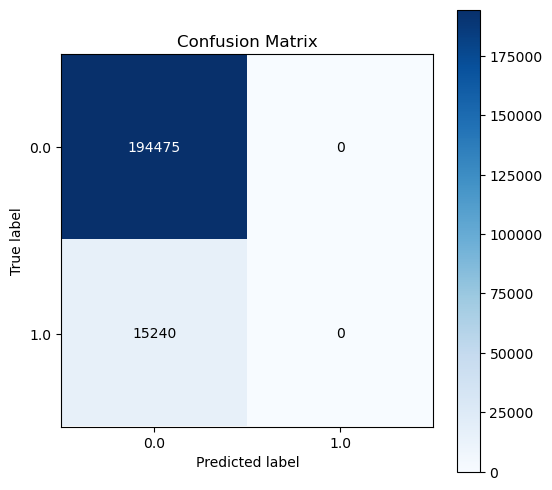

In [210]:
skplt.metrics.plot_confusion_matrix(Y_Test, 
                                    prediction,
                                    figsize = (6,6),
                                    title = "Confusion Matrix")

In [211]:
print(data)

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96    194475
         1.0       0.00      0.00      0.00     15240

    accuracy                           0.93    209715
   macro avg       0.46      0.50      0.48    209715
weighted avg       0.86      0.93      0.89    209715

